## Notes

- Altair takes the specification of a chart in JSON and passes it to Vega-Lite
- Vega-Lite is a format widely understood on the web to make interactive graphics (Wikipedia uses it.)
- If you write some code to produce a chart in Altair, use the Chart object's `to_dict()` method to obtain the dict/JSON
- Conversely, if you find some JSON of a chart you want to reproduce, use `alt.Chart.from_dict(json_as_dict)`
- Use type markers (Quantitative, Nominal, Ordinal, Temporal) to specify types or change how a column is interpreted
- Use `column, row` for facetting
- Add panels (stick charts together) with `|` or `hconcat` for horizontal and `&` or `vconcat` for vertical stacking
- Use `alt.layer()` or the `+` operator for adding layers
- Binning via `alt.X('Colx', bin=True)` converts a Quantitative variable into bins on-the-fly
    - use pandas binning tools if you want more control over the data
- Aggregate functions available [here](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation)    
- The `order` option and `Order` channel can sort how marks are drawn on the chart.
- Add interactivity via manual *selections* and *conditions*
       - For example, 
       - Use `alt.selection_interval(encodings=['x'])` to create a selection tool
       - Use the Chart object's properties method to add the selection tool to it
       - Use `alt.condition()` to add actions to be performed on elements within or outside the selection
- Altair charts use _embedded_ JSON representations of pandas DataFrames, so making many charts would essentially make many copies of your dataframe, leading to a `maxRowsError`
    - To use datasets larger than 5,000 rows, try the `alt.data_transformers.enable('json')` which converts the dataframe into a JSON file and references it, instead of embedding it into the notebook context       
---

## Read

- **Bertin's Semiology of Graphics**

---

## Examples

In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

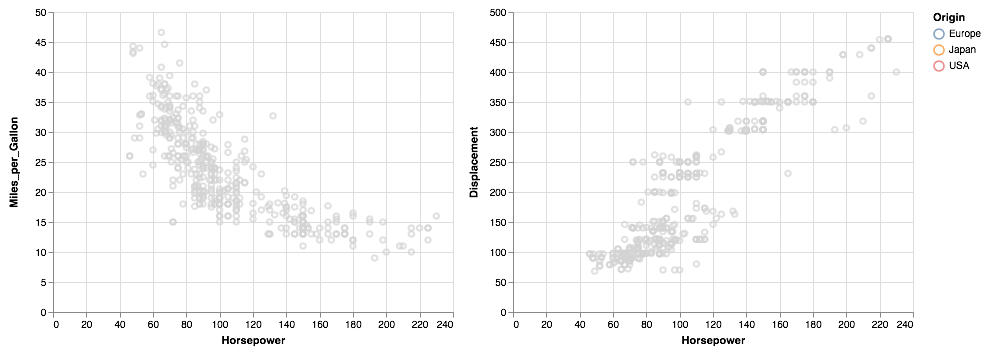

In [2]:
cars = data.cars()

sel = alt.selection_interval(encodings=['x'], empty='none')

base = \
(alt
 .Chart(data=cars)
 .mark_point()
 .encode(alt.X('Horsepower'),
         color=alt.condition(sel, 'Origin', alt.value('lightgray')),
         tooltip='Horsepower')
 .properties(selection=sel)
)

panels = alt.hconcat(
    base.encode(alt.Y('Miles_per_Gallon')), 
    base.encode(alt.Y('Displacement'))
)

panels.save('hconcatd-scatterplots-with-selection.html')
panels

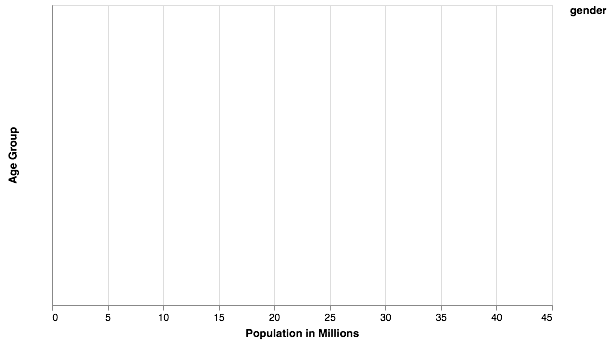

In [3]:
population = data.population()
population.head()

slider = alt.binding_range(min=population.year.min(), 
                           max=population.year.max(), 
                           step=10)

year = alt.selection_single(name="Select",
                            fields=['year'], 
                            bind=slider,
                            empty='none')


(alt
 .Chart(data=(population
              .assign(gender=lambda fr: fr['sex'].map(lambda i: 'Female' if i == 2 else 'Male'))
              .assign(people=lambda fr: fr['people']/10**6)              
             ),
        height=300, 
        width=500)
 .mark_bar(opacity=0.9)
 .encode(alt.X('sum(people):Q', axis=alt.Axis(title='Population in Millions'), scale=alt.Scale(domain=(0, 44))),
         alt.Y('age', bin=True, axis=alt.Axis(title='Age Group')),
         alt.Color('gender:N')) 
 .properties(selection=year)
 .transform_filter(year.ref())
)

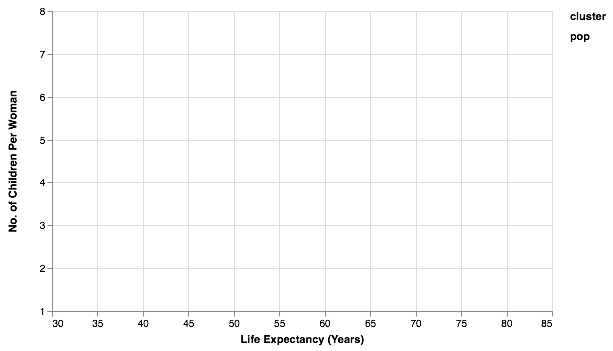

In [4]:
gapminder = data.gapminder()

slider = alt.binding_range(min=1955, 
                           max=2005, 
                           step=5)

year = alt.selection_single(name="Select",
                            fields=['year'], 
                            bind=slider,
                           empty='none')

(alt
 .Chart(data=gapminder, width=500)
 .mark_circle()
 .encode(alt.X('life_expect:Q', 
               scale=alt.Scale(zero=False, domain=(30, 85), clamp=True),
               axis=alt.Axis(title='Life Expectancy (Years)')),
         alt.Y('fertility:Q',
               scale=alt.Scale(zero=False, domain=(1, 8), clamp=True),
               axis=alt.Axis(title='No. of Children Per Woman')),
         color='cluster:N',
         size='pop',
         tooltip='country:N')
 .properties(selection=year)
 .transform_filter(year.ref())
)

In [5]:
movies = data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [6]:
[x for x in movies.columns if 'rating' in x.lower()]

['IMDB_Rating', 'MPAA_Rating', 'Rotten_Tomatoes_Rating']

In [7]:
movies[[x for x in movies.columns if 'rating' in x.lower()]].dropna()

,IMDB_Rating,MPAA_Rating,Rotten_Tomatoes_Rating
4,3.4,R,62.0
8,5.8,R,25.0
21,7.0,PG,57.0
28,7.1,R,77.0
31,3.2,PG,17.0
34,6.4,R,14.0
36,7.1,R,96.0
37,7.4,Not Rated,97.0
41,7.6,PG-13,88.0
43,6.6,PG-13,49.0
